In [17]:
# A notebook for random visualization of the data

__author__ = "Ba Hung Huynh"

In [18]:
import os
from pprint import pprint
from utils import data_loader
import pandas as pd
from datetime import datetime

In [19]:
path = "dataset/ieee-cis"
os.listdir(path)

['phase_1_data.tsf',
 'phase2_instance_large_4.txt',
 'phase1_instance_small_4.txt',
 'phase1_instance_small_3.txt',
 'phase2_instance_large_3.txt',
 'phase2_instance_large_2.txt',
 'phase1_instance_small_2.txt',
 'phase1_instance_small_0.txt',
 'phase2_instance_large_0.txt',
 'nov_data.tsf',
 'phase2_instance_large_1.txt',
 'phase1_instance_small_1.txt',
 'phase1_instance_large_1.txt',
 'phase2_instance_small_1.txt',
 'phase2_instance_small_0.txt',
 'phase_2_data.tsf',
 'phase1_instance_large_0.txt',
 'phase1_instance_large_2.txt',
 'phase2_instance_small_2.txt',
 'phase2_instance_small_3.txt',
 'phase1_instance_large_3.txt',
 'phase1_instance_large_4.txt',
 'phase2_instance_small_4.txt',
 'ERA5_Weather_Data_Monash.csv']

In [20]:
tsf_training_1 = data_loader.convert_tsf_to_dataframe(os.path.join(path, "phase_1_data.tsf"))[0]
tsf_training_1

,series_name,start_timestamp,series_value
0,Building0,2016-07-03 21:30:00,"[283.8, 283.8, 283.8, 606.0, 606.0, 606.0, 606..."
1,Building1,2019-01-09 23:15:00,"[8.1, 15.7, 22.8, 32.7, 8.1, 16.5, 24.7, 34.5,..."
2,Building3,2016-03-01 04:15:00,"[1321.0, 1321.0, 1321.0, 1321.0, 1293.0, 1293...."
3,Building4,2019-07-03 04:45:00,"[2.0, NaN, 1.0, 2.0, NaN, 2.0, NaN, NaN, 2.0, ..."
4,Building5,2019-07-25 23:00:00,"[30.0, 31.0, 24.0, 34.0, 30.0, 31.0, 26.0, 33...."
5,Building6,2019-07-25 01:45:00,"[36.8, 34.6, 34.6, 36.2, 36.2, 35.2, 35.2, 35...."
6,Solar0,2020-04-25 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,Solar1,2018-12-31 13:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,Solar2,2019-06-05 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,Solar3,2019-06-05 14:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


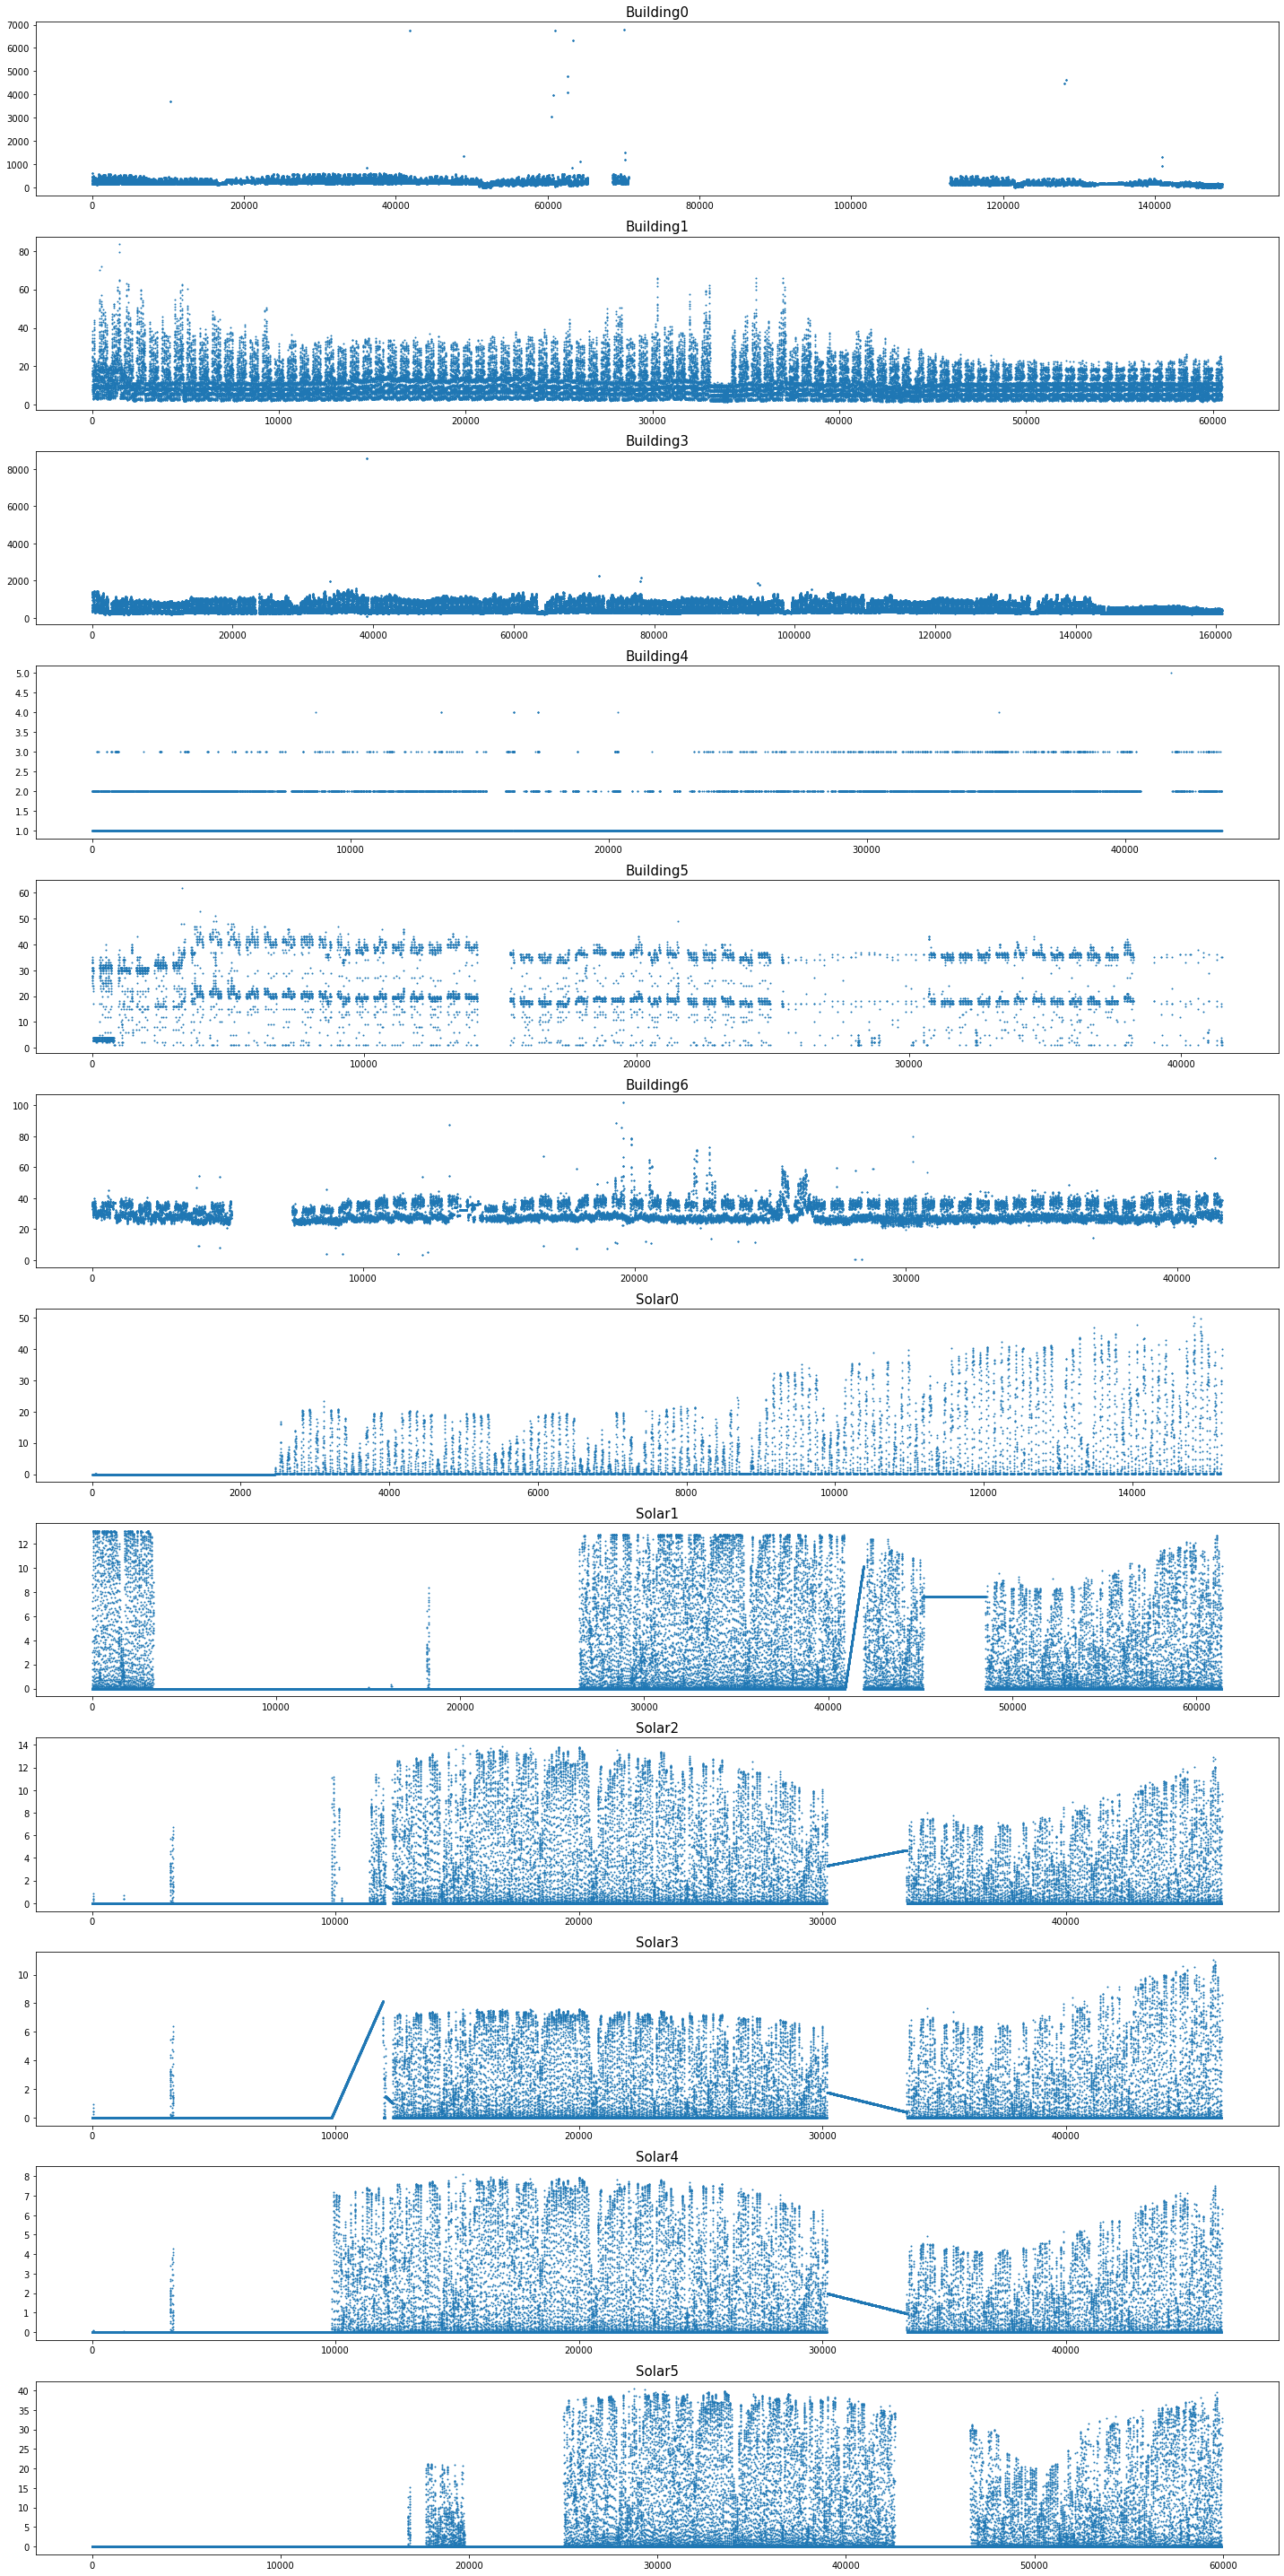

In [126]:
import matplotlib.pyplot as plt


def tsf_multi_plot(data, fna=False, limit=5):
  length = len(data)

  # TODO: This graph is missing time value, which is incremented by every 15 minutes from the start time

  # Combine all graphs into the same
  # Change the figsize value to fit your screen
  fig, axs = plt.subplots(length, figsize=(20, 40))

  for i in range(length):
    b = data.loc[i].series_value
    
    # Fill NaN value
    if fna is True:
      b = b.fillna(method='ffill', limit=limit)
      
    name = data.loc[i].series_name
    axs[i].set_title(f"{name}", fontsize=15)
    try:
      axs[i].plot(b, 'o', markersize=1)
    except TypeError:
      print(name, b)
      continue

  plt.tight_layout()
  plt.show()

tsf_multi_plot(tsf_training_1)

In [127]:
def date_stat(df):
  ls = []
  for i in df.iterrows():
    name = i[1]['series_name']
    start_date = i[1]['start_timestamp']
    length = len(i[1]['series_value'])
    end_date = start_date + pd.Timedelta(minutes=15*length)
    print(f"{name:10} {start_date} --> {end_date}  Data points {length}")
    ls.append(length)
  return ls, end_date

ls, end_date = date_stat(tsf_training_1)

Building0  2016-07-03 21:30:00 --> 2020-10-01 00:00:00  Data points 148810
Building1  2019-01-09 23:15:00 --> 2020-10-01 00:00:00  Data points 60483
Building3  2016-03-01 04:15:00 --> 2020-10-01 00:00:00  Data points 160783
Building4  2019-07-03 04:45:00 --> 2020-10-01 00:00:00  Data points 43757
Building5  2019-07-25 23:00:00 --> 2020-10-01 00:00:00  Data points 41572
Building6  2019-07-25 01:45:00 --> 2020-10-01 00:00:00  Data points 41657
Solar0     2020-04-25 14:00:00 --> 2020-10-01 00:00:00  Data points 15208
Solar1     2018-12-31 13:00:00 --> 2020-10-01 00:00:00  Data points 61388
Solar2     2019-06-05 14:00:00 --> 2020-10-01 00:00:00  Data points 46408
Solar3     2019-06-05 14:00:00 --> 2020-10-01 00:00:00  Data points 46408
Solar4     2019-06-05 14:00:00 --> 2020-10-01 00:00:00  Data points 46408
Solar5     2019-01-15 13:00:00 --> 2020-10-01 00:00:00  Data points 59948


In [128]:
tsf_training_2 = data_loader.convert_tsf_to_dataframe(os.path.join(path, "phase_2_data.tsf"))[0]
l = len(tsf_training_2)
for i, v in zip(range(l), ls):
  data = tsf_training_2['series_value'][i]
  tsf_training_2['series_value'][i] = data[v:]
  tsf_training_2['start_timestamp'][i] = end_date
  
#len(tsf_training_2['series_value'][0])
tsf_training_2

/var/folders/xv/qvm0rjns6kl0ltf5ygwwk0c00000gn/T/ipykernel_64936/2279548429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsf_training_2['series_value'][i] = data[v:]
/var/folders/xv/qvm0rjns6kl0ltf5ygwwk0c00000gn/T/ipykernel_64936/2279548429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsf_training_2['start_timestamp'][i] = end_date


,series_name,start_timestamp,series_value
0,Building0,2020-10-01,"[37.4, 14.6, 14.6, 14.6, 14.6, 1.0, 1.0, 1.0, ..."
1,Building1,2020-10-01,"[18.8, 4.8, 9.1, 14.0, 18.6, 4.4, 9.6, 14.1, 2..."
2,Building3,2020-10-01,"[415.0, 425.0, 425.0, 425.0, 425.0, 418.0, 418..."
3,Building4,2020-10-01,"[2.0, NaN, NaN, 1.0, NaN, NaN, NaN, 1.0, 1.0, ..."
4,Building5,2020-10-01,"[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, ..."
5,Building6,2020-10-01,"[41.4, 41.4, 42.4, 42.4, 43.0, 43.0, 43.0, 42...."
6,Solar0,2020-10-01,"[41.65, 43.1, 43.94, 44.79, 42.26, 42.16, 42.3..."
7,Solar1,2020-10-01,"[10.69, 11.39, 12.09, 11.77, 11.46, 11.27, 11...."
8,Solar2,2020-10-01,"[10.05, 10.7, 11.34, 11.26, 10.97, 11.02, 11.0..."
9,Solar3,2020-10-01,"[8.96, 9.54, 10.12, 9.97, 9.83, 9.78, 9.73, 10..."


Building5 <PandasArray>
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
 ...
 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
Length: 2976, dtype: object


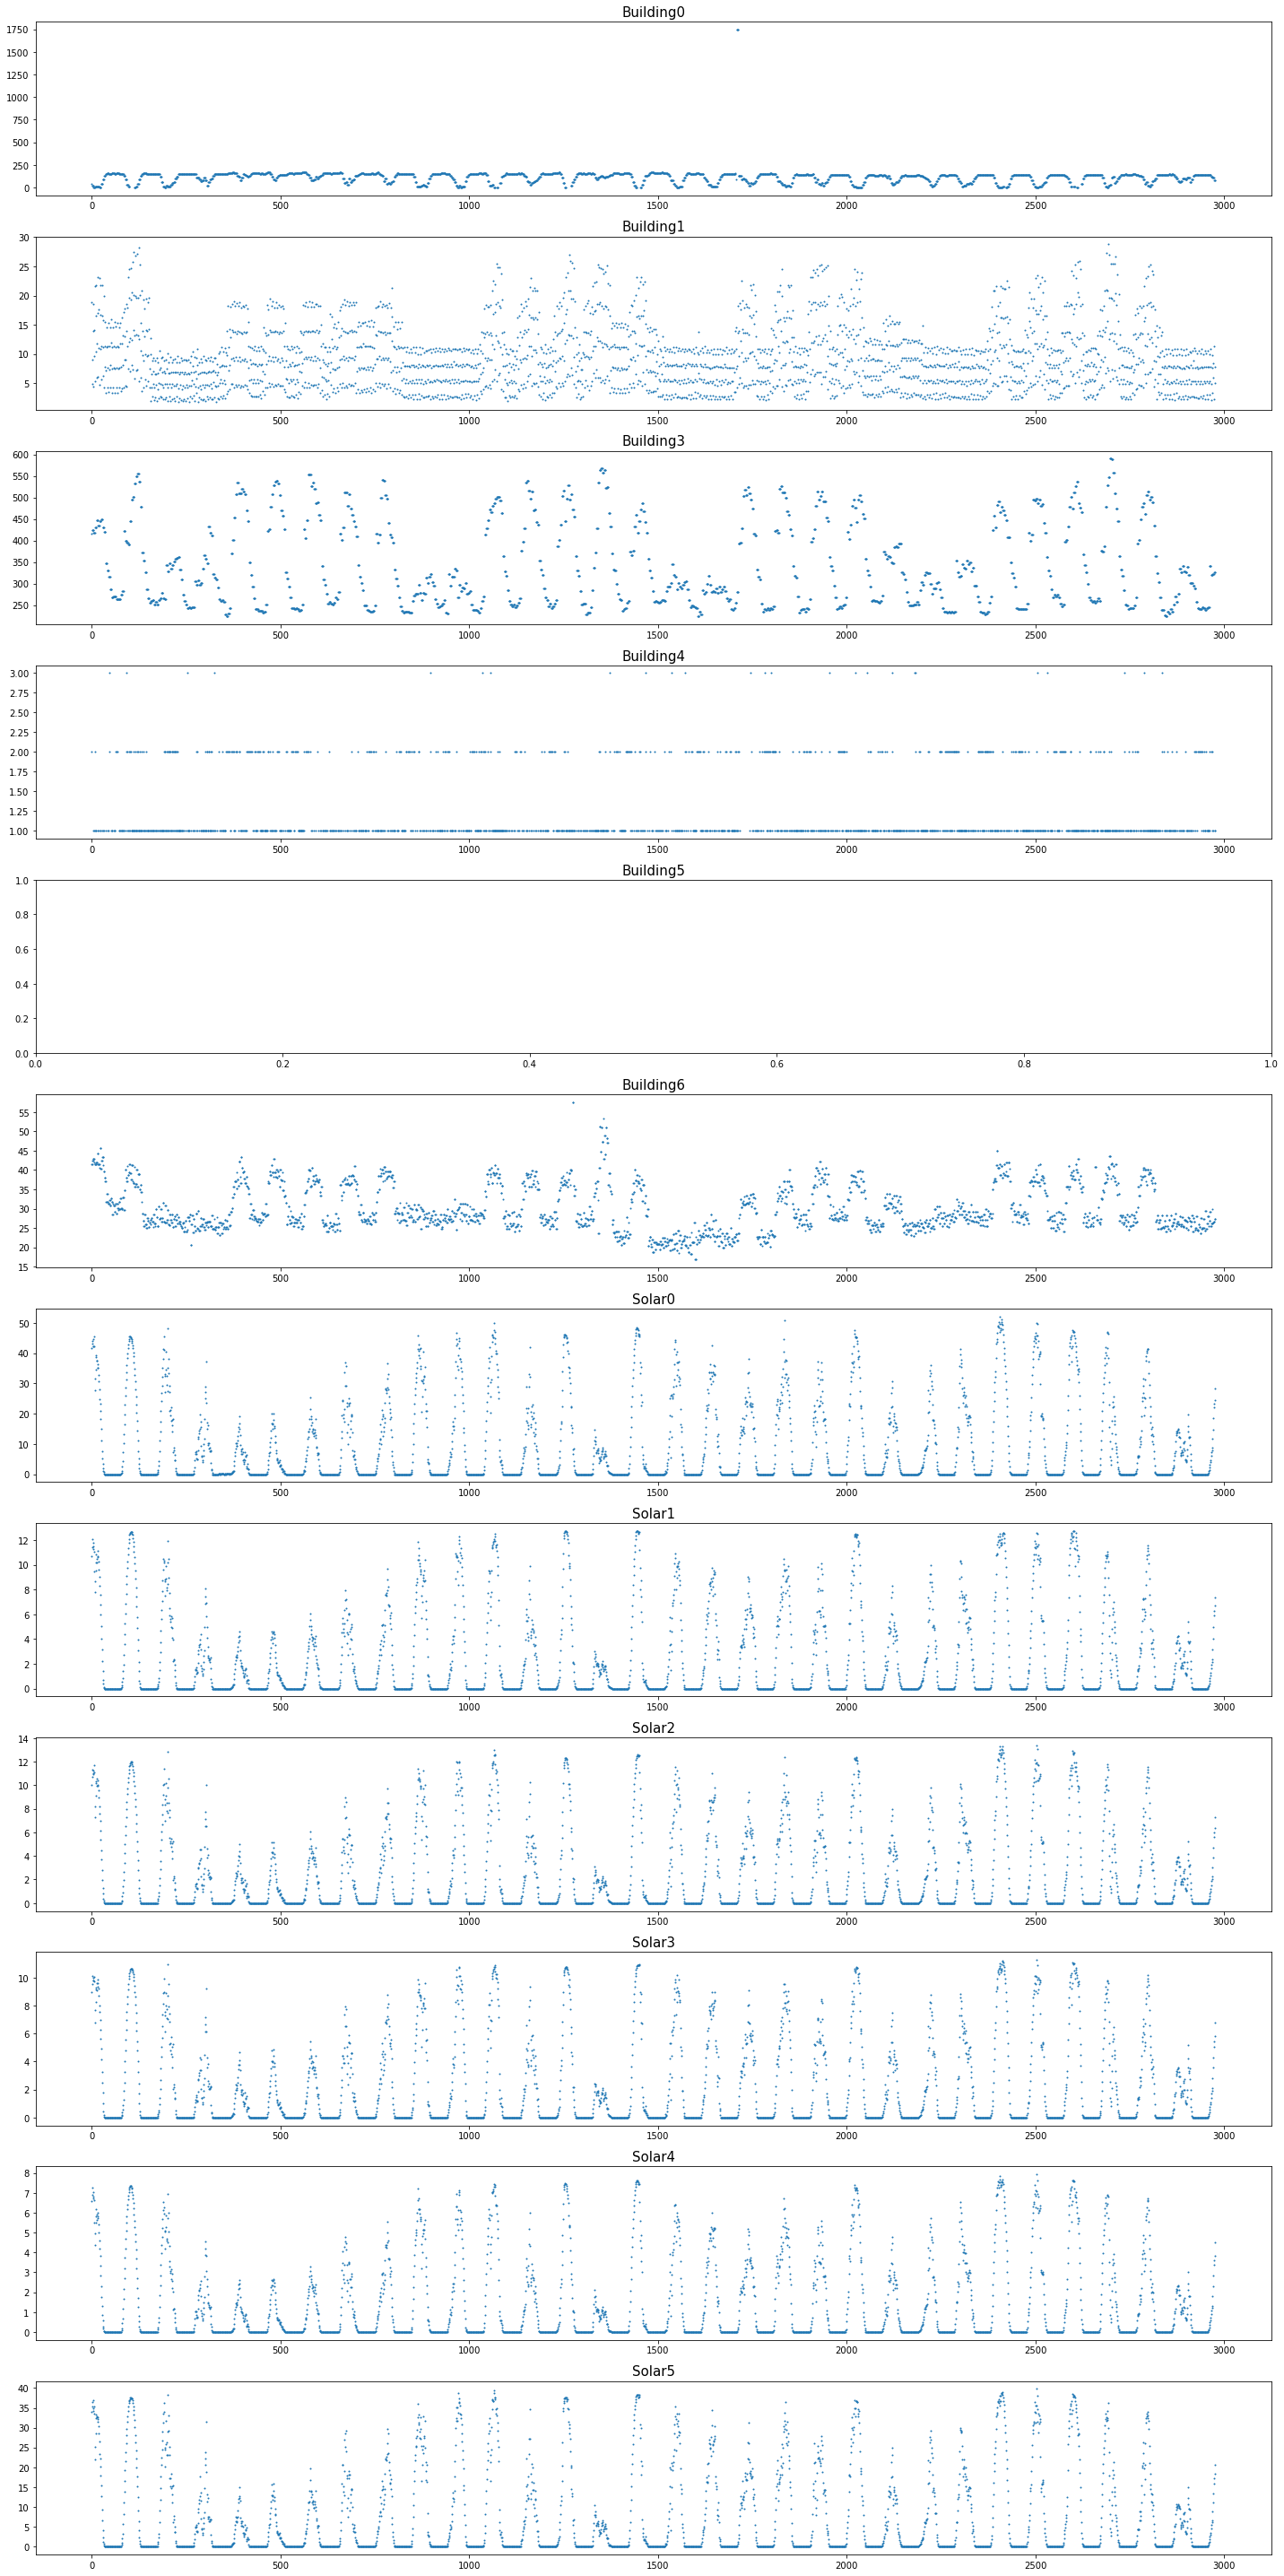

In [130]:
tsf_multi_plot(tsf_training_2, True, 10000)

In [131]:
date_stat(tsf_training_2)

Building0  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Building1  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Building3  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Building4  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Building5  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Building6  2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar0     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar1     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar2     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar3     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar4     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976
Solar5     2020-10-01 00:00:00 --> 2020-11-01 00:00:00  Data points 2976


([2976, 2976, 2976, 2976, 2976, 2976, 2976, 2976, 2976, 2976, 2976, 2976],
 Timestamp('2020-11-01 00:00:00'))

In [132]:
tsf_validation = data_loader.convert_tsf_to_dataframe(os.path.join(path, "nov_data.tsf"))[0]

first_building = tsf_validation.loc[0]
start_time = first_building["start_timestamp"]
length = len(first_building.series_value)
print(length)
print(start_time + pd.Timedelta(minutes=15*length))

154666
2020-12-01 00:00:00


In [133]:
weather_file = os.path.join(path,"ERA5_Weather_Data_Monash.csv")
weather_data = pd.read_csv(weather_file)
weather_data.head()

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.9


In [118]:
print(f"Start day: {weather_data['datetime (UTC)'].iloc[1]} \n\
End day: {weather_data['datetime (UTC)'].iloc[-1]} \n\
Total data points: {len(weather_data)}")

Start day: 2010-01-01 01:00:00 
End day: 2021-06-01 00:00:00 
Total data points: 100057


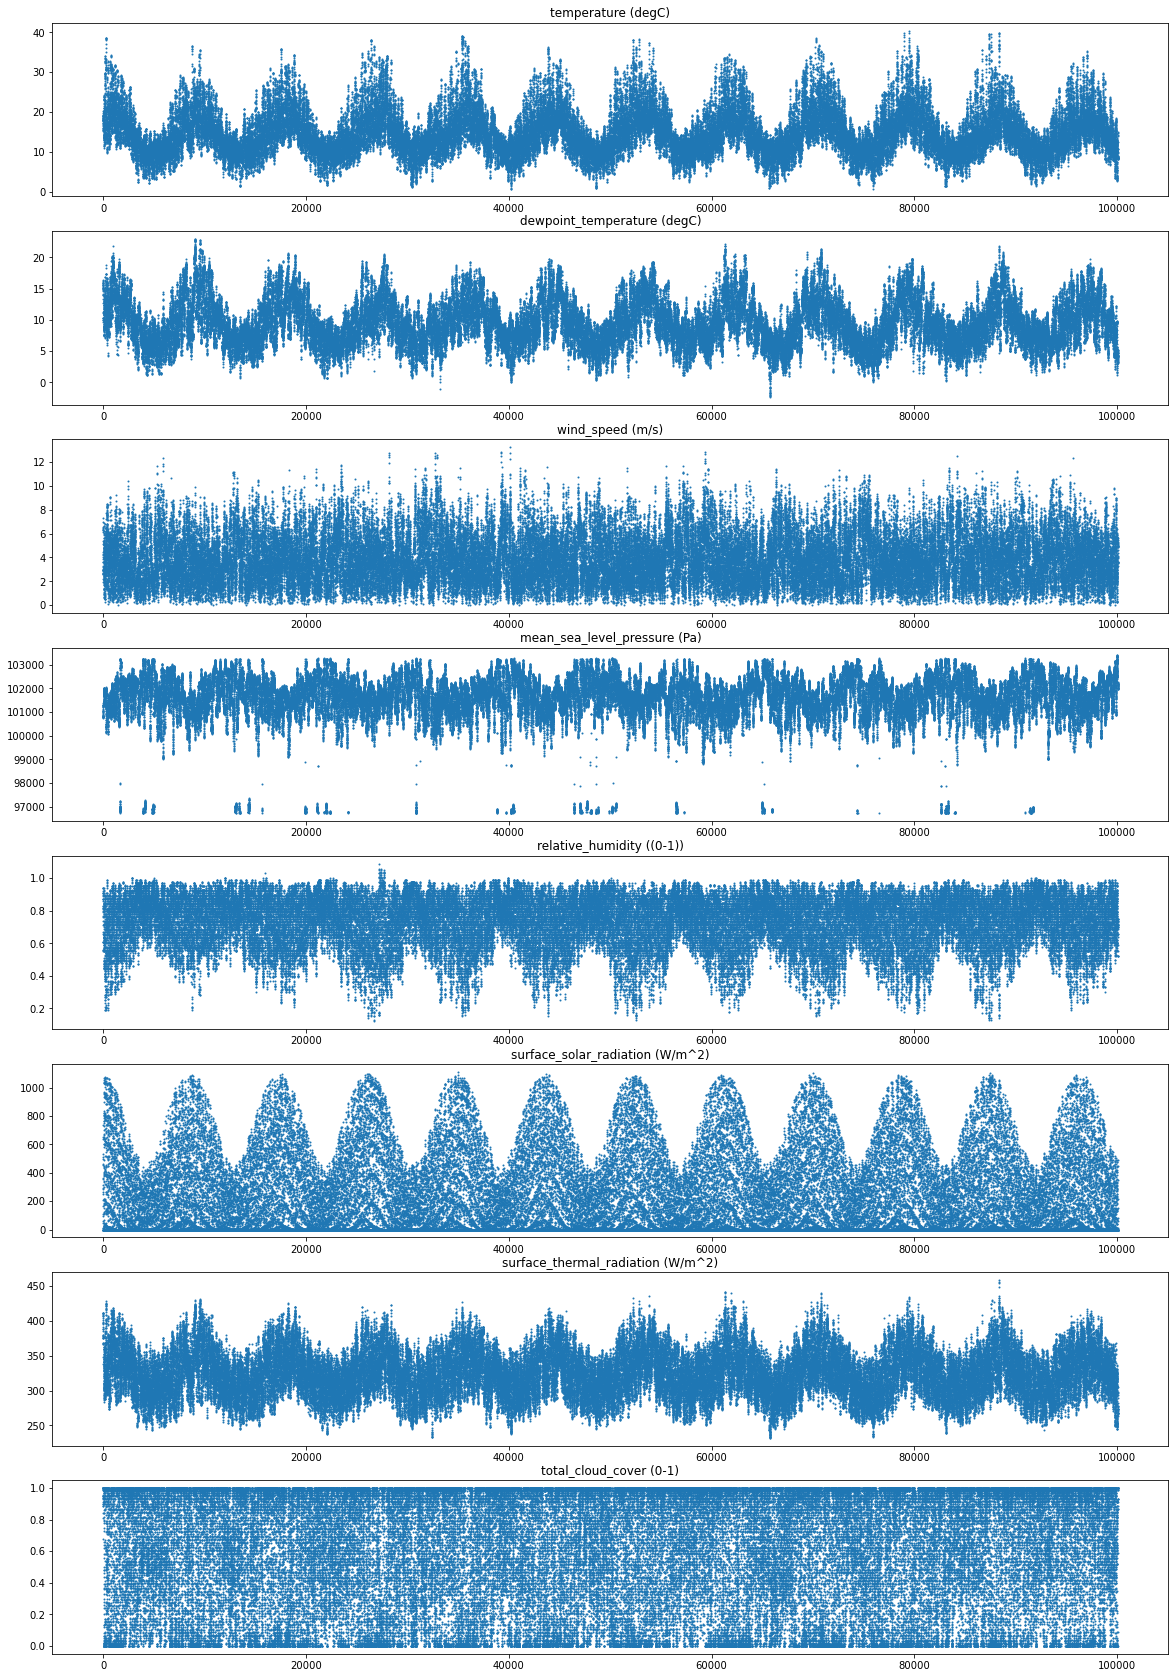

In [119]:
filter_weather_data = weather_data.loc[:, "temperature (degC)":]
length = len(filter_weather_data.columns)

fig, axs = plt.subplots(length, figsize=(20, 30)) 

for i, col in enumerate(filter_weather_data):
  axs[i].set_title(col)
  axs[i].plot(filter_weather_data[col], 'o', markersize=1)

plt.show()

In [120]:
print("All weather data is from 1 geo location:", weather_data["coordinates (lat,lon)"].unique())

All weather data is from 1 geo location: ['(-37.91, 145.13)']
